In [90]:
import pandas as pd
import numpy as np

data = pd.read_csv('Multi_31.txt', skiprows = 29,sep='\t')
 
data.columns = ['Timestamp', 'Channel A', 'Channel B', 'Unnamed']
data_1 = data.drop('Channel B', axis=1)
data_2 = data_1.drop('Unnamed', axis=1)
data_2['Channel A'] = pd.to_numeric(data_2["Channel A"], errors='coerce')
data_3 = data_2.dropna()
import sys
np.set_printoptions(threshold=sys.maxsize)
data_3.to_numpy()

e1 = (data_3.to_numpy()[:, 0] > 50)
e2 = (data_3.to_numpy()[:, 0] < 75)
arr = data_3.to_numpy()[e1 & e2]
print(data_3.to_numpy()[e1 & e2])
#print(data_3.to_numpy())
data_list = arr.tolist()
type(data_list)

[[50.015   0.1174]
 [50.079   0.117 ]
 [50.143   0.1182]
 [50.207   0.1169]
 [50.271   0.1183]
 [50.335   0.1178]
 [50.399   0.1177]
 [50.463   0.1178]
 [50.527   0.1175]
 [50.591   0.1178]
 [50.655   0.1177]
 [50.751   0.1176]
 [50.816   0.1171]
 [50.88    0.1176]
 [50.944   0.1178]
 [51.008   0.1185]
 [51.072   0.1179]
 [51.136   0.1178]
 [51.2     0.1177]
 [51.264   0.118 ]
 [51.328   0.118 ]
 [51.392   0.1176]
 [51.456   0.1179]
 [51.552   0.1175]
 [51.616   0.118 ]
 [51.68    0.118 ]
 [51.744   0.1183]
 [51.808   0.1179]
 [51.872   0.1181]
 [51.936   0.1177]
 [52.      0.1182]
 [52.064   0.1181]
 [52.128   0.1178]
 [52.192   0.1172]
 [52.256   0.1176]
 [52.352   0.118 ]
 [52.416   0.1185]
 [52.48    0.1186]
 [52.544   0.1181]
 [52.608   0.1186]
 [52.672   0.1185]
 [52.736   0.1183]
 [52.8     0.1186]
 [52.864   0.1184]
 [52.928   0.1189]
 [52.992   0.1192]
 [53.056   0.1195]
 [53.152   0.1195]
 [53.216   0.1194]
 [53.28    0.1191]
 [53.344   0.1193]
 [53.408   0.1192]
 [53.472   0

list

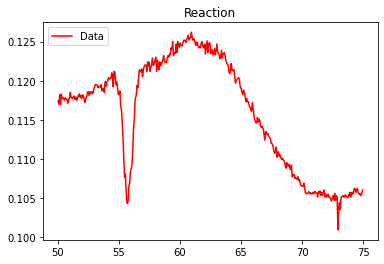

0.1262
The x-value with maximum y-value is : 7.455555555555556


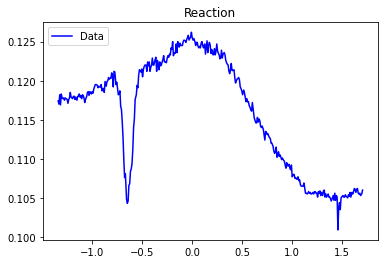

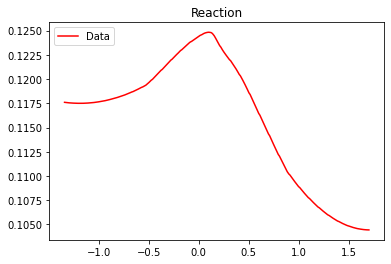

In [91]:
import matplotlib.pyplot as plt 
from scipy.signal import savgol_filter
xi = arr[:,0]
x = arr[:,0]
y = arr[:,1]
yfi = savgol_filter(y, 201, 2) # window size 51, polynomial order 3

plt.plot(xi,y,'-r') 
plt.title('Reaction') 
plt.legend(['Data'], loc='upper left')
plt.show()

a = max(y)
print(a)
# Python3 code to demonstrate 
# to get tuple info. of maximum value tuple
# using max() + itemgetter()
from operator import itemgetter
# using max() + itemgetter()
# to get tuple info. of maximum value tuple
toc = 9/1.1
res = 61
# printing result
print ("The x-value with maximum y-value is : " + str(res/toc))

plt.plot((x-res)/toc,y,'-b') 
#toc - time for moving translation stage by 1cm. 
plt.title('Reaction') 
plt.legend(['Data'], loc='upper left')
plt.show()

plt.plot(((x-res)/toc),yfi,'-r') 
plt.title('Reaction') 
plt.legend(['Data'], loc='upper left')
plt.show()

In [92]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
# Define the function
def Open(x,c,d):
    return c*(1 - (d/(1 + x**2)))
popt, pcov = curve_fit(Open, (x-res)/toc, yfi)


In [93]:
from pylab import *
fit_c = popt[0]
fit_d = popt[1]
err_c = sqrt(pcov[0][0])
err_d = sqrt(pcov[1][1])
print("The best fit for c is: " + str(fit_c))
print("The best fit for d is: " + str(fit_d))
print("The error for c is: " + str(err_c))
print("The error for d is: " + str(err_d))


The best fit for c is: 0.10058010054798748
The best fit for d is: -0.23602485845528418
The error for c is: 0.0004929029421943209
The error for d is: 0.008224229876549813


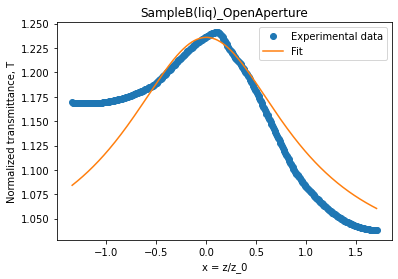

In [94]:
fit_y = Open((x-res)/toc, fit_c, fit_d)
plt.title('SampleB(liq)_OpenAperture') 
plt.xlabel('x = z/z_0')
plt.ylabel('Normalized transmittance, T')
plt.plot((x-res)/toc, yfi/fit_c, 'o', label='Experimental data')
plt.plot((x-res)/toc, fit_y/fit_c, '-', label='Fit')
plt.legend()